### Given two list of x and y coordinates, and a list of errors on y, find the parabola that minimizes the sum of square distances between the parabola and the (x,y) points.

In [32]:

from sympy import *

import numpy as np
import scipy.stats
import csv
import matplotlib.pyplot as plt
import pandas as pd
from random import randint


In [33]:
xx, yy, aa, bb, cc = symbols('xx yy aa bb cc')

In [34]:

#Livello di criticità es. (.05)
alpha=.05
unma='cm'
unmb='N'
plt.rcParams['figure.figsize'] = [15, 10]

#Importo dati.csv con tre colonne (x, y, yerr) in tre liste

data = csv.reader(open('dati.csv', 'r'), delimiter=",", quotechar='|')
lxcol, lycol, lyerrcol = [], [], []

for row in data:
    lxcol.append(row[0])
    lycol.append(row[1])
    lyerrcol.append(row[2])
    
#Converto in array
ydatap = np.asarray(lycol, dtype=np.float64)

yerrp = np.asarray(lyerrcol, dtype=np.float64)
print('')

xdataor = np.asarray(lxcol, dtype=np.float64)
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata
#xdata=xdataor


0.005
0.04
57.14285714285714
1.2857142857142856


array([-1.        , -0.71428571, -0.42857143, -0.14285714,  0.14285714,
        0.42857143,  0.71428571,  1.        ])

In [36]:
ydata = ydatap
yerr = yerrp
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)) : print ("dimensioni vettori disuguali")

We want to find the parameters $a$ and $b$ of the parabola $y = c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

The minimum condition can be derived expanding $(yy - cc \cdot xx^2 - bb \cdot xx - aa)^2$, and equating the derivatives with respect to $aa$, $bb$, $cc$ to zero. 

In [37]:
s = expand((yy - cc*xx**2 - bb*xx - aa)**2)
s

aa**2 + 2*aa*bb*xx + 2*aa*cc*xx**2 - 2*aa*yy + bb**2*xx**2 + 2*bb*cc*xx**3 - 2*bb*xx*yy + cc**2*xx**4 - 2*cc*xx**2*yy + yy**2

In [38]:
s_aa = diff(s,aa)
s_aa

2*aa + 2*bb*xx + 2*cc*xx**2 - 2*yy

In [39]:
s_bb = diff(s,bb)
s_bb

2*aa*xx + 2*bb*xx**2 + 2*cc*xx**3 - 2*xx*yy

In [40]:
s_cc = diff(s,cc)
s_cc

2*aa*xx**2 + 2*bb*xx**3 + 2*cc*xx**4 - 2*xx**2*yy

$a$, $b$ and $c$ are the solutions of the linear system:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2}\\
\sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2} & \sum_i \frac{x_i^4}{\sigma_i^2}\\
\end{bmatrix}$
$\begin{bmatrix} a\\b\\c \end{bmatrix}$ = 
$\begin{bmatrix} 
\sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\\\sum_i \frac{x_i^2 y_i}{\sigma_i^2}
\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [41]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_x2_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_x3_over_yerrSq = (xdata*xdata*xdata/yerrSq).sum()
sum_x4_over_yerrSq = (xdata*xdata*xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()
sum_x2y_over_yerrSq = (xdata*xdata*ydata/yerrSq).sum()

In [42]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq,sum_x2_over_yerrSq],
                [sum_x_over_yerrSq,sum_x2_over_yerrSq,sum_x3_over_yerrSq],
                [sum_x2_over_yerrSq,sum_x3_over_yerrSq,sum_x4_over_yerrSq]])
matD_inv = np.linalg.inv(matD)
matD
matD_inv

array([[ 6.66000000e-06,  1.28494576e-21, -8.82000000e-06],
       [ 1.28494576e-21,  6.72000000e-06, -4.31248918e-21],
       [-8.82000000e-06, -4.31248918e-21,  2.05800000e-05]])

Check D^(-1)D = I

In [43]:
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -2.91054989e-32, -6.20580501e-16],
       [ 2.46519033e-32,  1.00000000e+00, -4.93038066e-32],
       [ 5.26989441e-17, -2.82006318e-32,  1.00000000e+00]])

In [44]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq,sum_x2y_over_yerrSq])
matB

array([84635.41666667, 31312.00396825, 36166.02891156])

In [14]:
np.dot(matD_inv,matB)

array([ 9.88819398,  6.54536107, -1.27663194])

In [45]:
a, b, c = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1],np.dot(matD_inv,matB)[2]
print(" a = ", a)
print(" b = ", b)
print(" c = ", c)

 a =  0.24468749999999984
 b =  0.2104166666666667
 c =  -0.002187499999999787


Calcolo varianze ed errori sui parametri (Attenzione a cifre significative e unita' di misura!!)

In [46]:
vara, varb, varc= matD_inv[0,0], matD_inv[1,1], matD_inv[2,2]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
print(" errore su a = ",erra)
print(" errore su b = ",errb)
print(" errore su c = ",errc)

 errore su a =  0.002580697580112787
 errore su b =  0.002592296279363144
 errore su c =  0.0045365184888855005


Plot, adding extra points for the parabola.

<ErrorbarContainer object of 3 artists>

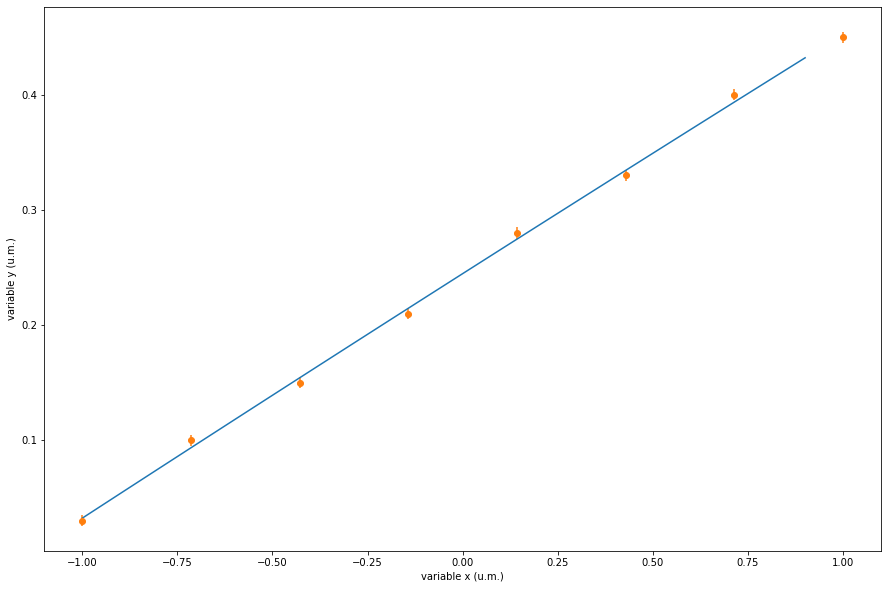

In [51]:
fig, ax = plt.subplots()
thickxdata = np.arange(-1.,1.,0.1)
ax.set_xlabel('variable x (u.m.)')
ax.set_ylabel('variable y (u.m.)')
# ax.set_xlim(0, 5); ay.set_xlim(0, 5) PEr cambiare range plot
plt.plot(thickxdata,c*thickxdata*thickxdata+b*thickxdata+a)
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o')

In [48]:
scarto1 = (ydata-a-b*xdata-c*xdata*xdata)/yerr
scarto2 = (ydata-a-b*xdata-c*xdata*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-3)).sum()
errst = np.sqrt(errstSq)
print(" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)

 Chi^2 =  7.879670965608459
 errore standard della stima =  0.006025738445163694


In [49]:
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
yatteso =a+b*xdata+c*xdata*xdata
scarto3=yatteso-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print("coefficiente determinazione = ",detercoeff)

coefficiente determinazione =  0.9994025763116183


In [56]:

#CSV Fit
#First column merging with um
aatext='Parametro a ['+ unma+ ']'
print(aatext)
abtext='Parametro b ['+ unmb+ '])'
print(abtext)
actext='Parametro c ['+ unma+ '])'
print(actext)
erratext='Errore su a ['+ unmb+ '])'
print(erratext)
errbtext='Errore su b ['+ unmb+ '])'
print(errbtext)
errctext='Errore su c ['+ unmb+ '])'
print(errctext)
determtext='Coeff. di determinaz.'
print(errctext)
#Creating Arrays
corrhead = np.array(['Variabile','Valore'])

aa = np.array([aatext,c])
ab = np.array([abtext,b])
ac = np.array([actext,a])
aerra = np.array([erratext,errc])
aerrb = np.array([errbtext,errb])
aerrc = np.array([errctext,erra])

adeterm = np.array([determtext,detercoeff])
#writing csv
with open('corr.csv', mode='w') as corr:
    corr_writer = csv.writer(corr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    corr_writer.writerow(corrhead)
    corr_writer.writerow(aa)
    corr_writer.writerow(ab)
    corr_writer.writerow(ac)
    corr_writer.writerow(aerra) 
    corr_writer.writerow(aerrb) 
    corr_writer.writerow(aerrc) 
    corr_writer.writerow(adeterm)

#Plot
#-----------------------------------------------------------------------------------------------------

#Chi2 logic test
def check(c2,cr,su):
    if c2>cr:
        return 'Rigettato'
    elif c2<cr and c2>su:
        return 'Accettato'
    elif c2<su:
        return 'Sospetto'
    else:
        print('Check error')
        return 0
    
#Numero GDL
n=len(xdata)-3
print('len',len(xdata))
crit=scipy.stats.chi2.ppf(1-alpha , df=n)
sus=scipy.stats.chi2.ppf(alpha , df=n)

print('Chi quadro critico, ',crit)
print('Chi quadro sospetto, ',sus)
es=check(chi2,crit,sus)
print("Esito del test, ",es)

#Arrays for csv
asig = np.array(['Livello di significatività',alpha])
agdl = np.array(['Gradi di libertà',crit])
acrit = np.array(['Chi quadro critico',crit])
chi = np.array(['Chi quadro ',chi2])
asus = np.array(['Chi quadro sospetto',sus])
esito = np.array(['Esito',es])
head = np.array(['Variabile','Valore'])
#CSV writing
with open('fit.csv', mode='w') as fit:
    fit_writer = csv.writer(fit, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    fit_writer.writerow(head)
    fit_writer.writerow(asig)
    fit_writer.writerow(agdl)
    fit_writer.writerow(chi)    
    fit_writer.writerow(acrit)
    fit_writer.writerow(asus)
    fit_writer.writerow(esito)   
    
print('')
print('')

dfcorr = pd.read_csv ('corr.csv')
dffit = pd.read_csv ('fit.csv')
    
print('')
print('')
print(dfcorr)
    
print('')
print('')
print(dffit)
    
print('')
print('')
indexcorr='corr'+str(randint(0, 1000))
indexfit='fit'+str(randint(0, 1000))
    
print('')
print('')
print(dfcorr.to_latex(index=False, caption='Dati relativi al fit lineare', bold_rows=True, label=indexcorr, position='ht'))
    
print('')
print('')
print(dffit.to_latex(index=False,  caption='Dati relativi al test del $\chi^2$', bold_rows=True, label=indexfit, position='ht'))

    
print('')
print('')


Parametro a [cm]
Parametro b [N])
Parametro c [cm])
Errore su a [N])
Errore su b [N])
Errore su c [N])
Errore su c [N])
len 8
Chi quadro critico,  11.070497693516351
Chi quadro sospetto,  1.1454762260617692
Esito del test,  Accettato




               Variabile    Valore
0       Parametro a [cm] -0.002187
1       Parametro b [N])  0.210417
2      Parametro c [cm])  0.244687
3       Errore su a [N])  0.004537
4       Errore su b [N])  0.002592
5       Errore su c [N])  0.002581
6  Coeff. di determinaz.  0.999403


                    Variabile              Valore
0  Livello di significatività                0.05
1            Gradi di libertà  11.070497693516351
2                 Chi quadro    7.879670965608459
3          Chi quadro critico  11.070497693516351
4         Chi quadro sospetto  1.1454762260617692
5                       Esito           Accettato




\begin{table}[ht]
\centering
\caption{Dati relativi al fit lineare}
\label{corr240}
\begin{tabular}{lr}
\toprule
            V